In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

df = pd.read_csv('data/up.csv')

In [4]:
X = df[['AreaSQM', 'Floors', 'Bedrooms', 'Yard', 'Bathrooms']]
y = df[['Price_Php_M']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.transform(X_train)

### Create and train Sequential Model

In [22]:
# Sequential model
sequential_model = tf.keras.models.Sequential()

# Add layers to the sequential model
sequential_model.add(tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
sequential_model.add(tf.keras.layers.Dropout(0.2))
sequential_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
sequential_model.add(tf.keras.layers.Dropout(0.2))
sequential_model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
sequential_model.add(tf.keras.layers.Dropout(0.2))
sequential_model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
sequential_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
sequential_model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
4/4 [==============================] - 1s 45ms/step - loss: 138.7901 - mean_squared_error: 137.4973 - val_loss: 167.5076 - val_mean_squared_error: 166.2243
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 135.5088 - mean_squared_error: 134.2290 - val_loss: 163.6991 - val_mean_squared_error: 162.4244
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 132.3215 - mean_squared_error: 131.0491 - val_loss: 159.9574 - val_mean_squared_error: 158.6886
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 130.0039 - mean_squared_error: 128.7367 - val_loss: 155.3178 - val_mean_squared_error: 154.0531
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 126.7201 - mean_squared_error: 125.4565 - val_loss: 149.3402 - val_mean_squared_error: 148.0781
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 119.5506 - mean_squared_error: 118.2890 - val_loss: 141.1333 - val_mean_squared_error: 139.87

### Create and Predict Models

In [18]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV

# Create models
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
elastic_net = ElasticNetCV(alphas=[0.1, 1.0, 10.0], cv=5)

linear_model = LinearRegression(n_jobs=-1)

xgboost = XGBRegressor()
grid_search = GridSearchCV(xgboost, {'max_depth': [2, 4, 6], 'n_estimators': [10, 50, 100]}, verbose=1, cv=5)

# Train the models using the training sets
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

linear_model.fit(X_train_scaled, y_train)
xgboost.fit(X_train_scaled, y_train)
grid_search.fit(X_train_scaled, y_train)

# Make predictions using the testing set
linear_regression_predict = linear_model.predict(X_test_scaled)
xgboost_predict = xgboost.predict(X_test_scaled)

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

Fitting 5 folds for each of 9 candidates, totalling 45 fits


E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_in

### Evaluate Models

In [23]:
# R squared score for each prediction
print('Ridge R^2: %.2f' % metrics.r2_score(y_test, ridge.predict(X_test_scaled)))
print('Lasso R^2: %.2f' % metrics.r2_score(y_test, lasso.predict(X_test_scaled)))
print('Elastic Net R^2: %.2f' % metrics.r2_score(y_test, elastic_net.predict(X_test_scaled)), end='\n\n')

print('Linear Regression R^2: %.2f' % metrics.r2_score(y_test, linear_regression_predict))
print('XGBoost R^2: %.2f' % metrics.r2_score(y_test, xgboost_predict))
print('XGBoost Grid Search R^2: %.2f' % metrics.r2_score(y_test, grid_search.predict(X_test_scaled)), end='\n\n')

print('Linear regression with Tensorflow R^2: %.2f' % metrics.r2_score(y_test, sequential_model.predict(X_test_scaled)))

Ridge R^2: 0.94
Lasso R^2: 0.94
Elastic Net R^2: 0.93

Linear Regression R^2: 0.94
XGBoost R^2: 0.85
XGBoost Grid Search R^2: 0.90

1/1 [==============================] - 0s 67ms/step
Linear regression with Tensorflow R^2: 0.93


### Plot Predictions

1/1 [==============================] - 0s 17ms/step


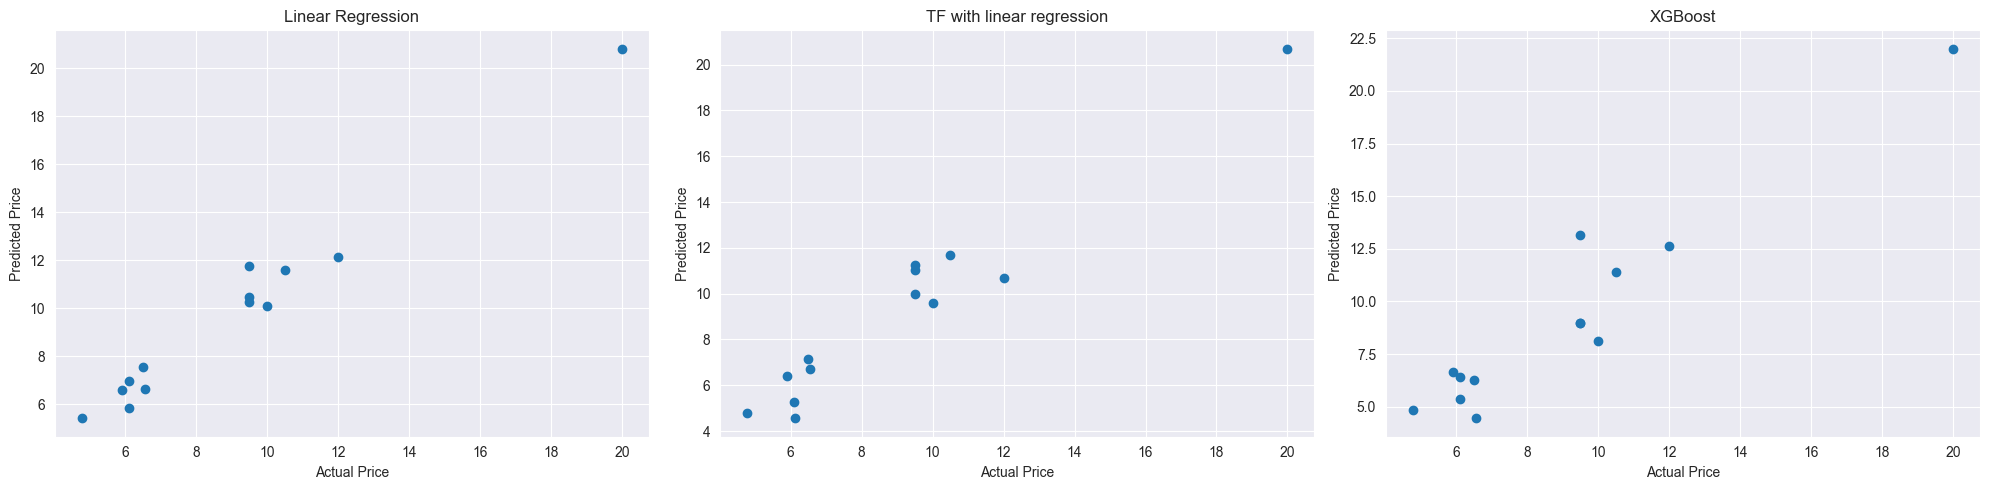

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_regression_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test, sequential_model.predict(X_test_scaled))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('TF with linear regression')

plt.subplot(1, 3, 3)
plt.scatter(y_test, xgboost_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost')

plt.tight_layout()
plt.show()

<Axes: xlabel='Price_Php_M'>

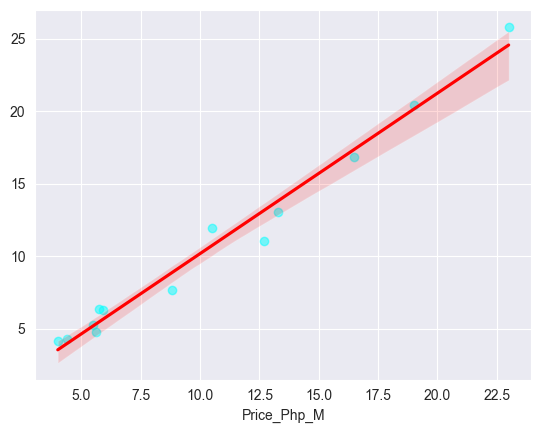

In [13]:
import seaborn as sb

sb.regplot(x= y_test,
           y= linear_regression_predict,
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"}
           )

<Axes: xlabel='Price_Php_M'>

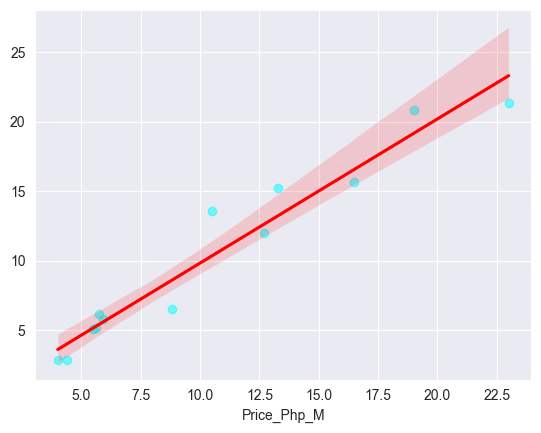

In [14]:
sb.regplot(x= y_test,
           y= xgboost_predict,
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"}
           )

1/1 [==============================] - 0s 19ms/step


<Axes: xlabel='Price_Php_M'>

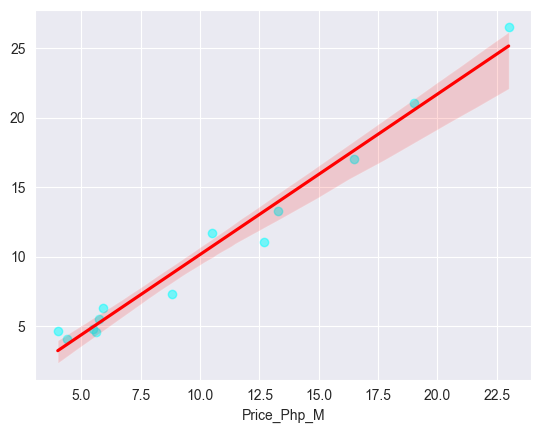

In [15]:
sb.regplot(x= y_test,
           y= sequential_model.predict(X_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"}
           )

### Save Models

In [25]:
from joblib import dump

dump(ridge, 'models/ridge.joblib')
dump(lasso, 'models/lasso.joblib')
dump(elastic_net, 'models/elastic_net.joblib')

dump(linear_model, 'models/linear_regression.joblib')

xgboost.save_model('models/xgboost.json')
dump(grid_search.best_estimator_, 'models/grid_search.joblib')

sequential_model.save('models/sequential.keras')

### Load Trained Models

In [38]:
from joblib import load

trained_ridge = load('models/ridge.joblib')
trained_lasso = load('models/lasso.joblib')
trained_elastic_net = load('models/elastic_net.joblib')

trained_linear_model = load('models/linear_regression.joblib')

trained_xgboost = XGBRegressor(objective ='reg:squarederror', n_estimators = -1, importance_type = 'gain', booster = 'gbtree', tree_method = 'auto', predictor = 'auto')
trained_xgboost.load_model('models/xgboost.json')

trained_grid_search = load('models/grid_search.joblib')

trained_sequential_model = tf.keras.models.load_model('models/sequential.keras')


### Load, Clean, and Normalize the Other Dataset

In [39]:
df_other = pd.read_csv('data/up.csv')
df_other.drop_duplicates()

X_other = df_other[['Bedrooms', 'Bathrooms', 'AreaSQM', 'Floors', 'Yard']]
y_other = df_other[['Price_Php_M']]

X_other_train, X_other_test, y_other_train, y_other_test = train_test_split(X_other, y_other, test_size=0.2)

scaler = StandardScaler()
X_other_test_scaled = scaler.fit_transform(X_other_test)
X_other_train_scaled = scaler.transform(X_other_train)

### Retrain the models with the other dataset

In [40]:
trained_ridge.fit(X_other_train_scaled, y_other_train)
trained_lasso.fit(X_other_train_scaled, y_other_train)
trained_elastic_net.fit(X_other_train_scaled, y_other_train)

trained_linear_model.fit(X_other_train_scaled, y_other_train)

trained_xgboost.fit(X_other_train_scaled, y_other_train)
trained_grid_search.fit(X_other_train_scaled, y_other_train)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
sequential_model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
4/4 [==============================] - 0s 21ms/step - loss: 6.1697 - mean_squared_error: 5.2730 - val_loss: 3.6640 - val_mean_squared_error: 2.7710
Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 3.5620 - mean_squared_error: 2.6690

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

4/4 [==============================] - 0s 11ms/step - loss: 5.8479 - mean_squared_error: 4.9567 - val_loss: 3.0978 - val_mean_squared_error: 2.2103
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 5.4027 - mean_squared_error: 4.5177 - val_loss: 3.1901 - val_mean_squared_error: 2.3086
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 5.2334 - mean_squared_error: 4.3529 - val_loss: 3.2478 - val_mean_squared_error: 2.3677
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 4.1296 - mean_squared_error: 3.2494 - val_loss: 3.1050 - val_mean_squared_error: 2.2242
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 5.9278 - mean_squared_error: 5.0464 - val_loss: 3.3564 - val_mean_squared_error: 2.4732
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 4.6125 - mean_squared_error: 3.7288 - val_loss: 4.1984 - val_mean_squared_error: 3.3139
Epoch 8/200
4/4 [==============================] - 0s 11

### Evaluate the models with the other dataset

In [41]:
print('Trained Ridge train score: %.2f' % metrics.r2_score(y_other_train, trained_ridge.predict(X_other_train_scaled)))
print('Trained Ridge test score: %.2f' % metrics.r2_score(y_other_test, trained_ridge.predict(X_other_test_scaled)), end='\n\n')

print('Trained Lasso train score: %.2f' % metrics.r2_score(y_other_train, trained_lasso.predict(X_other_train_scaled)))
print('Trained Lasso test score: %.2f' % metrics.r2_score(y_other_test, trained_lasso.predict(X_other_test_scaled)), end='\n\n')

print('Trained Elastic Net train score: %.2f' % metrics.r2_score(y_other_train, trained_elastic_net.predict(X_other_train_scaled)))
print('Trained Elastic Net test score: %.2f' % metrics.r2_score(y_other_test, trained_elastic_net.predict(X_other_test_scaled)), end='\n\n')

print('Trained Linear Regression train score: %.2f' % metrics.r2_score(y_other_train, trained_linear_model.predict(X_other_train_scaled)))
print('Trained Linear Regression test score: %.2f' % metrics.r2_score(y_other_test, trained_linear_model.predict(X_other_test_scaled)), end='\n\n')

print('Trained XGBoost train score: %.2f' % metrics.r2_score(y_other_train, trained_xgboost.predict(X_other_train_scaled)))
print('Trained XGBoost test score: %.2f' % metrics.r2_score(y_other_test, trained_xgboost.predict(X_other_test_scaled)))

print('Trained XGBoost Grid Search train score: %.2f' % metrics.r2_score(y_other_train, trained_grid_search.predict(X_other_train_scaled)))
print('Trained XGBoost Grid Search test score: %.2f' % metrics.r2_score(y_other_test, trained_grid_search.predict(X_other_test_scaled)), end='\n\n')

print('Trained Sequential Model train score: %.2f' % metrics.r2_score(y_other_train, trained_sequential_model.predict(X_other_train_scaled)))
print('Trained Sequential Model test score: %.2f' % metrics.r2_score(y_other_test, trained_sequential_model.predict(X_other_test_scaled)))


Trained Ridge train score: 0.97
Trained Ridge test score: 0.96

Trained Lasso train score: 0.97
Trained Lasso test score: 0.96

Trained Elastic Net train score: 0.97
Trained Elastic Net test score: 0.96

Trained Linear Regression train score: 0.97
Trained Linear Regression test score: 0.96

Trained XGBoost train score: -2.55
Trained XGBoost test score: -2.81
Trained XGBoost Grid Search train score: 1.00
Trained XGBoost Grid Search test score: 0.95

2/2 [==============================] - 0s 2ms/step
Trained Sequential Model train score: 0.60
1/1 [==============================] - 0s 18ms/step
Trained Sequential Model test score: 0.75


### Plot Predictions

1/1 [==============================] - 0s 25ms/step


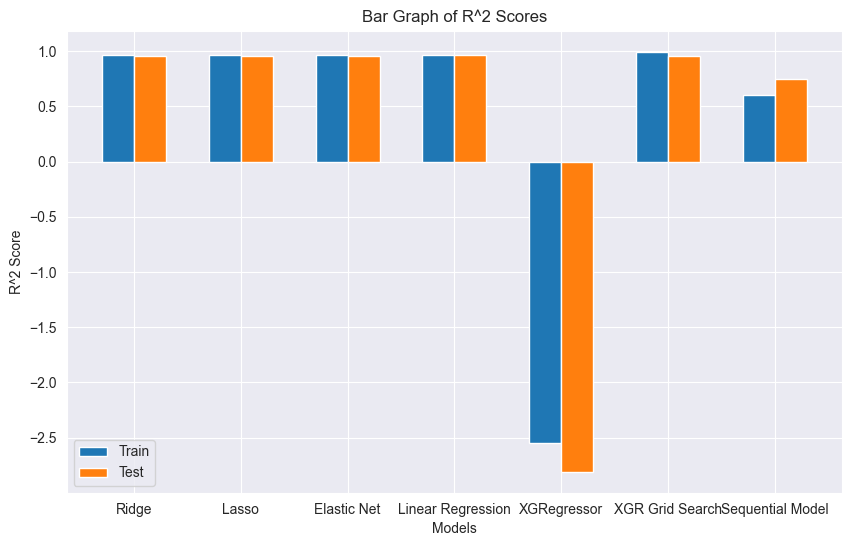

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate R^2 scores for each model
models = ['Ridge', 'Lasso', 'Elastic Net', 'Linear Regression', 'XGRegressor', 'XGR Grid Search', 'Sequential Model']
r2_scores_train = [metrics.r2_score(y_other_train, model.predict(X_other_train_scaled)) for model in [trained_ridge, trained_lasso, trained_elastic_net, trained_linear_model, trained_xgboost, trained_grid_search, trained_sequential_model]]
r2_scores_test = [metrics.r2_score(y_other_test, model.predict(X_other_test_scaled)) for model in [trained_ridge, trained_lasso, trained_elastic_net, trained_linear_model, trained_xgboost, trained_grid_search, trained_sequential_model]]

# Create bar graph
bar_width = 0.30
index = np.arange(len(models))
fig, ax = plt.subplots(figsize=(10, 6))
bar_train = ax.bar(index - bar_width/2, r2_scores_train, bar_width, label='Train')
bar_test = ax.bar(index + bar_width/2, r2_scores_test, bar_width, label='Test')
ax.set_xlabel('Models')
ax.set_ylabel('R^2 Score')
ax.set_title('Bar Graph of R^2 Scores')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()
plt.show()

### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

cross_valid_ridge = cross_val_score(trained_ridge, X_other_train_scaled, y_other_train, cv=5, scoring='r2')
cross_valid_lasso = cross_val_score(trained_lasso, X_other_train_scaled, y_other_train, cv=5, scoring='r2')
cross_valid_elastic_net = cross_val_score(trained_elastic_net, X_other_train_scaled, y_other_train, cv=5, scoring='r2')

cross_valid_linear = cross_val_score(trained_linear_model, X_other_train_scaled, y_other_train, cv=5, scoring='r2')
cross_valid_xgboost = cross_val_score(trained_xgboost, X_other_train_scaled, y_other_train, cv=5, scoring='r2')

cross_valid_grid_search = cross_val_score(trained_grid_search, X_other_train_scaled, y_other_train, cv=5, scoring='r2')

print('Trained Ridge Cross Validation R^2: %.2f' % cross_valid_ridge.mean())
print('Trained Lasso Cross Validation R^2: %.2f' % cross_valid_lasso.mean())
print('Trained Elastic Net Cross Validation R^2: %.2f' % cross_valid_elastic_net.mean(), end='\n\n')
print('Trained Linear Regression Cross Validation R^2: %.2f' % cross_valid_linear.mean())
print('Trained XGBoost Cross Validation R^2: %.2f' % cross_valid_xgboost.mean())
print('Trained XGBoost Grid Search Cross Validation R^2: %.2f' % cross_valid_grid_search.mean(), end='\n\n')

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A 

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x00000184B5304D90>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

### Save Models

In [44]:
from joblib import dump

dump(trained_ridge, 'models/ridge.joblib')
dump(trained_lasso, 'models/lasso.joblib')
dump(trained_elastic_net, 'models/elastic_net.joblib')
dump(grid_search.best_estimator_, 'models/grid_search.joblib')

dump(trained_linear_model, 'models/linear_regression.joblib')
trained_xgboost.save_model('models/xgboost.json')

trained_sequential_model.save('models/sequential.keras')

### Plot Predictions with Line regression

Text(0.5, 1.0, 'Ridge Prediction')

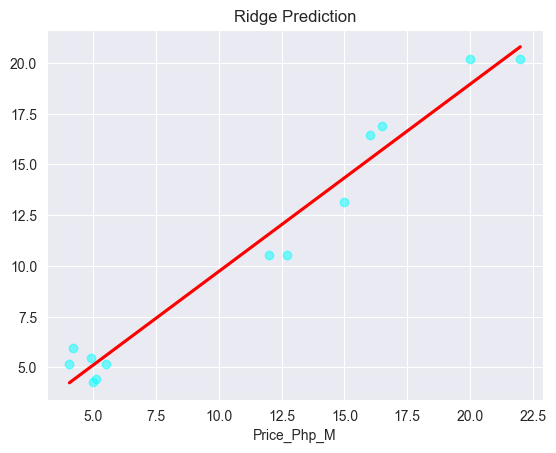

In [60]:
import seaborn as sb

sb.regplot(x= y_other_test,
           y= trained_ridge.predict(X_other_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
           ).set_title('Ridge Prediction')

Text(0.5, 1.0, 'Lasso Prediction')

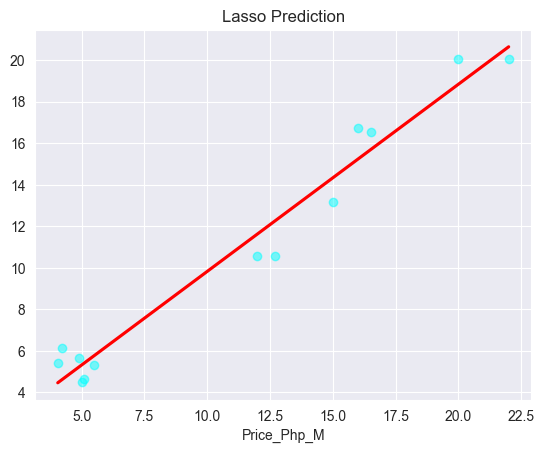

In [61]:
sb.regplot(x= y_other_test,
           y= trained_lasso.predict(X_other_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
           ).set_title('Lasso Prediction')

Text(0.5, 1.0, 'Elastic Net Prediction')

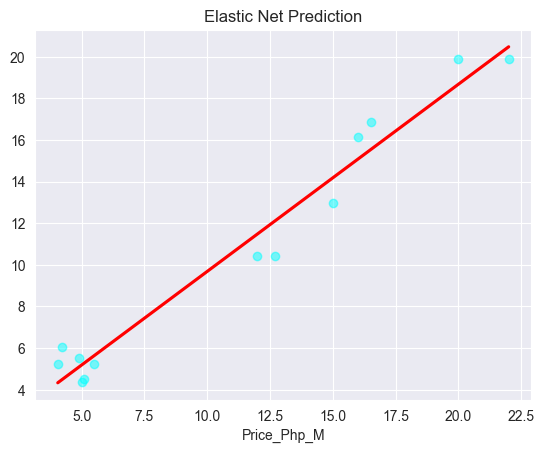

In [62]:
sb.regplot(x= y_other_test,
           y= trained_elastic_net.predict(X_other_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
           ).set_title('Elastic Net Prediction')

Text(0.5, 1.0, 'Linear Regression Prediction')

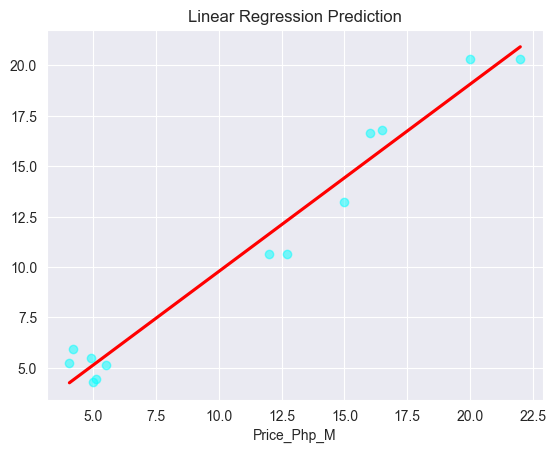

In [63]:
sb.regplot(x=y_other_test,
           y=trained_linear_model.predict(X_other_test_scaled),
           scatter_kws={"color": "cyan", "alpha": 0.5},
           line_kws={"color": "red"},
           ci= None
           ).set_title('Linear Regression Prediction')

Text(0.5, 1.0, 'XGRegressor Grid Search Prediction')

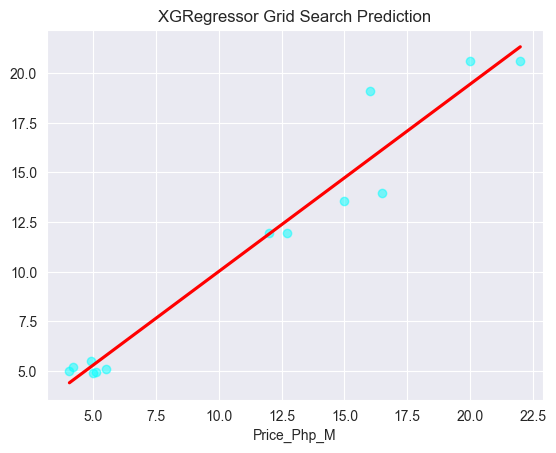

In [64]:
sb.regplot(x= y_other_test,
           y= trained_grid_search.predict(X_other_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
           ).set_title('XGRegressor Grid Search Prediction')

Text(0.5, 1.0, 'XGRegressor Prediction')

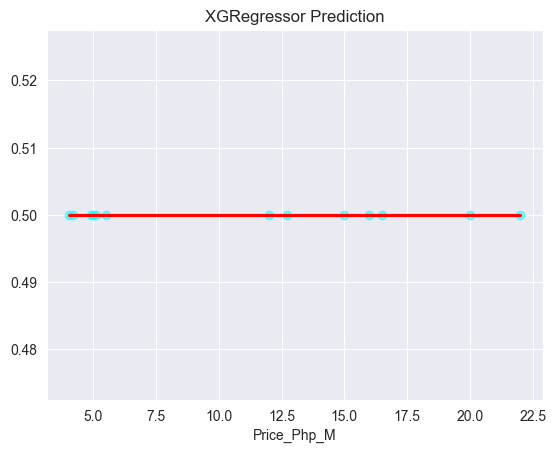

In [65]:
sb.regplot(x= y_other_test,
              y= trained_xgboost.predict(X_other_test_scaled),
              scatter_kws= {"color": "cyan", "alpha": 0.5},
              line_kws= {"color": "red"},
              ci= None
              ).set_title('XGRegressor Prediction')

1/1 [==============================] - 0s 17ms/step


Text(0.5, 1.0, 'Sequential Model Prediction')

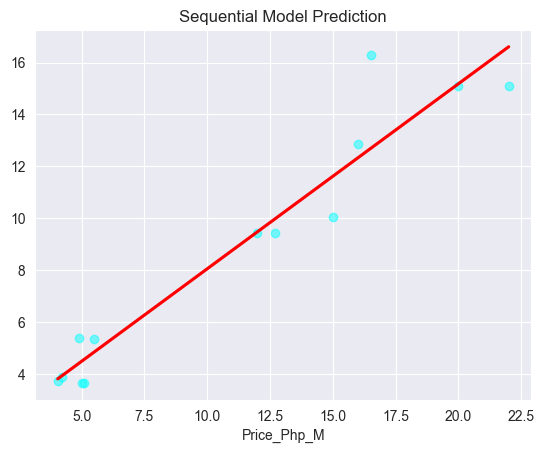

In [66]:
sb.regplot(x= y_other_test,
           y= trained_sequential_model.predict(X_other_test_scaled), 
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
            ).set_title('Sequential Model Prediction')

### Plot Learning Curves

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\model_selection\_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 100.
  warnings.warn(


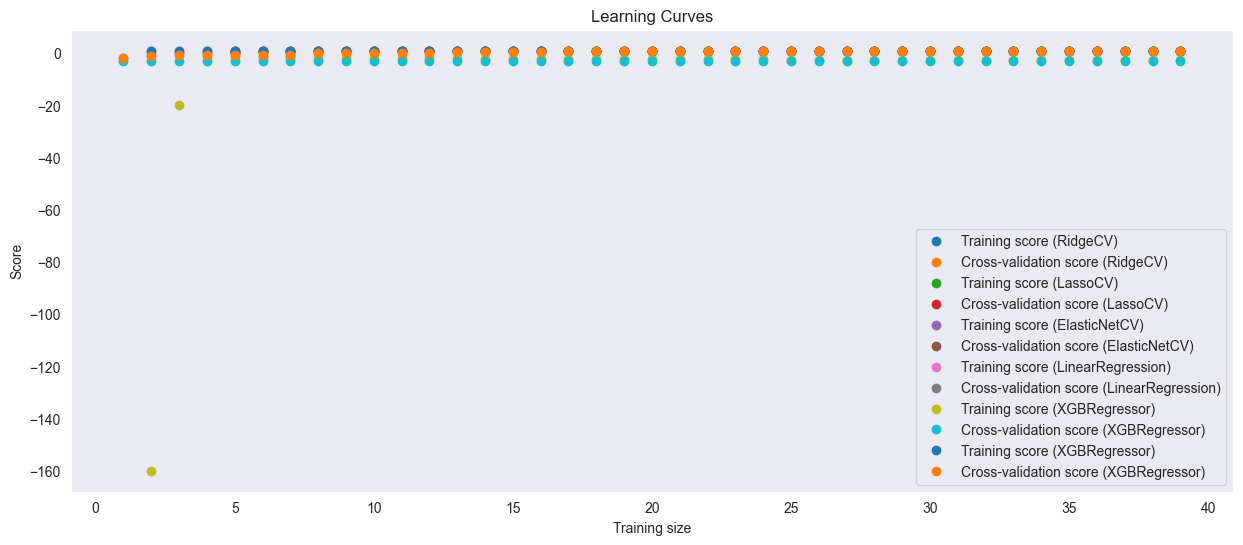

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

plt.figure(figsize=(15, 6))

trained_models = [trained_ridge, trained_lasso, trained_elastic_net, trained_linear_model, trained_xgboost, trained_grid_search]

for model in trained_models:
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_other_train_scaled,
        y_other_train,
        cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    train_sizes = list(set(train_sizes))
    
    plt.plot(train_sizes, train_scores_mean, 'o', label=f"Training score ({model.__class__.__name__})")
    plt.plot(train_sizes, test_scores_mean, 'o', label=f"Cross-validation score ({model.__class__.__name__})")
    
plt.xlabel("Training size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.grid()
plt.show()